<a href="https://colab.research.google.com/github/AnanyaUp/Quantum-Machine-Learning/blob/main/QML_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit qiskit_aer

In [ ]:
import pandas as pd
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from math import asin, sqrt
train = pd.read_csv('/content/Titanic-Dataset.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def chance_to_survive(age):
    pop = train[train.Age.eq(age)]
    surv = pop[pop.Survived.eq(1)]
    prob = len(surv)/(len(pop)+1)
    return "A {}-year old passenger had a chance to survive of {}".format(age, prob)

print(chance_to_survive(47))
print(chance_to_survive(48))

A 47-year old passenger had a chance to survive of 0.1
A 48-year old passenger had a chance to survive of 0.6


In [ ]:
max_child_age = 8

# probability to survive of children
pop_child = train[train.Age.le(max_child_age)]
surv_child = pop_child[pop_child.Survived.eq(1)]
p_child = len(surv_child)/len(pop_child)

# probability to survive of adults
pop_adult = train[train.Age.gt(max_child_age)]
surv_adult = pop_adult[pop_adult.Survived.eq(1)]
p_adult = len(surv_adult)/len(pop_adult)

print("{} children had a chance to survive of {}".format(len(pop_child), round(p_child, 2)))
print("{} adults had a chance to survive of {}".format(len(pop_adult), round(p_adult, 2)))

54 children had a chance to survive of 0.67
660 adults had a chance to survive of 0.38


In [ ]:
%matplotlib inline

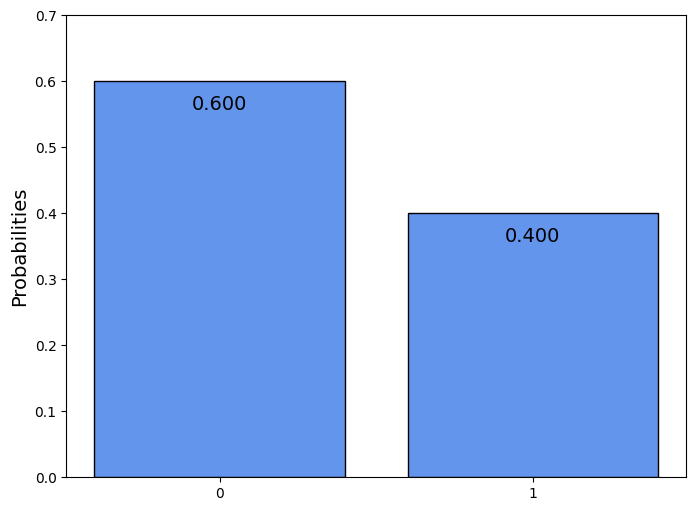

In [ ]:
def prob_to_angle(prob):
    return 2 * asin(sqrt(prob))

# Build circuit
qc = QuantumCircuit(1)
qc.ry(prob_to_angle(0.4), 0)

# save the statevector
qc.save_statevector()

# Run with statevector backend
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()

# Retrieve saved statevector
statevector = result.data(0)["statevector"]

# Calculate probabilities
p0 = abs(statevector[0])**2
p1 = abs(statevector[1])**2

# Plot probabilities
labels = ['0', '1']
probs = [p0, p1]

plt.figure(figsize=(8,6))
bars = plt.bar(labels, probs, color='cornflowerblue', edgecolor='black')

plt.ylabel("Probabilities", fontsize=14)
plt.ylim(0, 0.7)

# Add probability values on top
for bar, prob in zip(bars, probs):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        f"{prob:.3f}",
        ha="center",
        va="bottom",
        fontsize=14
    )

plt.show()


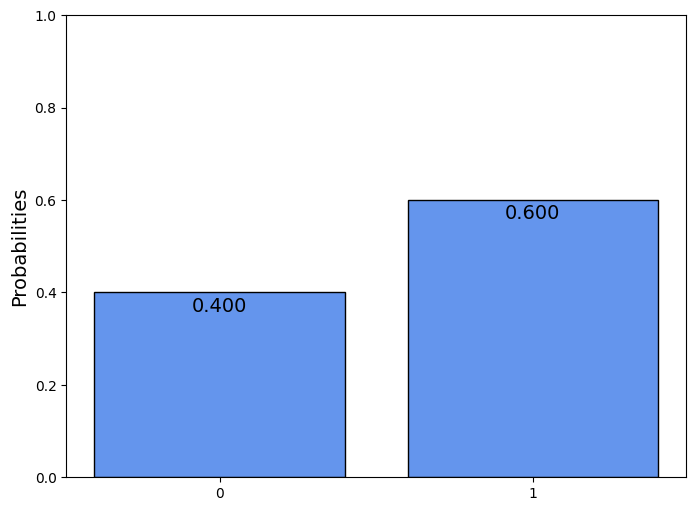

In [ ]:
def prob_to_angle(prob):
    return 2 * asin(sqrt(prob))

# Build circuit
qc = QuantumCircuit(1)
qc.ry(prob_to_angle(0.4), 0)
qc.x(0)  # NOT GATE

# Save the statevector
qc.save_statevector()

# Run with statevector simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()

# Retrieve stored statevector
statevector = result.data(0)["statevector"]

# Extract probabilities
p0 = abs(statevector[0])**2
p1 = abs(statevector[1])**2

# Prepare plot
labels = ['0', '1']
probs = [p0, p1]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, probs, color='cornflowerblue', edgecolor='black')

plt.ylabel("Probabilities", fontsize=14)
plt.ylim(0, 1)

# Label bars with probabilities
for bar, prob in zip(bars, probs):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        f"{prob:.3f}",
        ha="center",
        va="bottom",
        fontsize=14
    )

plt.show()


/tmp/ipython-input-3098389664.py:27: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(ampl)**2 for ampl in statevector]


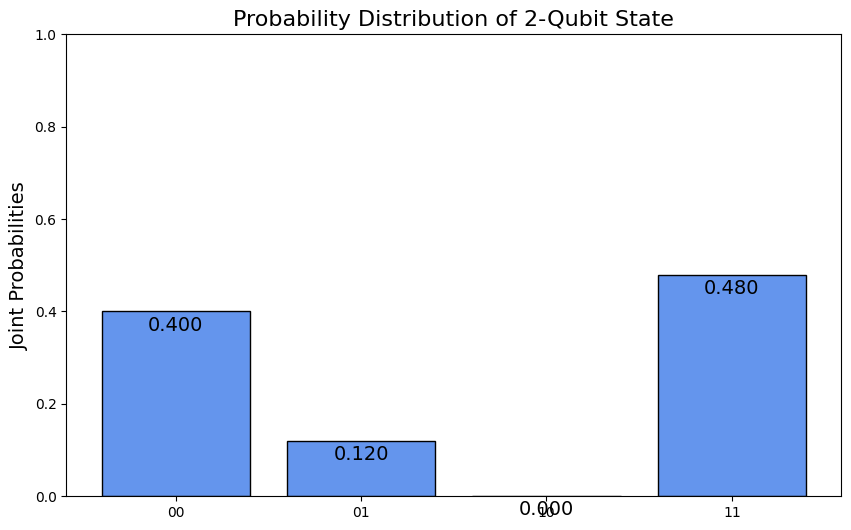

In [ ]:
def prob_to_angle(prob):
    return 2 * asin(sqrt(prob))

# Build circuit
qc = QuantumCircuit(2)

# Prior P(A=1) = 0.4
qc.ry(prob_to_angle(0.4), 0)

# Switch value
qc.x(0)

# Conditional event with probability 0.8
qc.cry(prob_to_angle(0.8), 0, 1)

# IMPORTANT for Qiskit 1.x → save the statevector
qc.save_statevector()

# Run simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()

# Retrieve the statevector
statevector = result.data(0)["statevector"]

# Compute joint probabilities
probs = [abs(ampl)**2 for ampl in statevector]

# Labels: |00>, |01>, |10>, |11>
labels = ["00", "01", "10", "11"]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")
plt.ylabel("Joint Probabilities", fontsize=14)
plt.title("Probability Distribution of 2-Qubit State", fontsize=16)
plt.ylim(0, 1)

# Add values above bars
for bar, prob in zip(bars, probs):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        f"{prob:.3f}",
        ha="center",
        va="bottom",
        fontsize=14
    )

plt.show()


/tmp/ipython-input-2631210750.py:25: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(a)**2 for a in statevector]


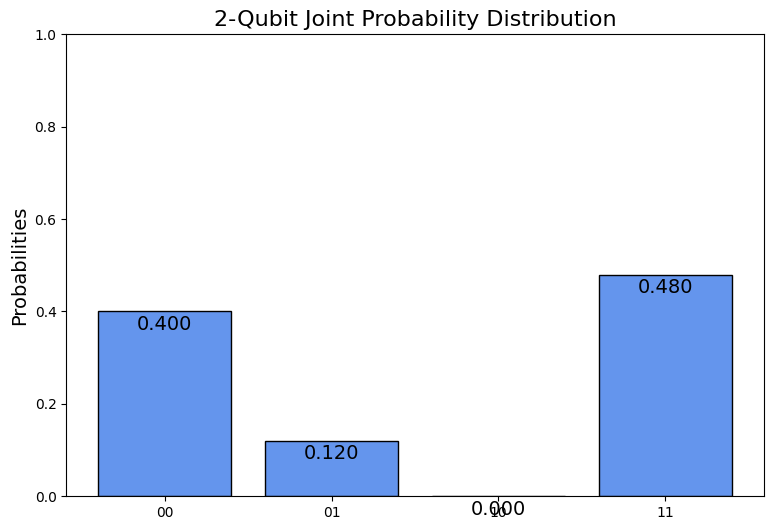

In [ ]:
def prob_to_angle(prob):
    return 2 * asin(sqrt(prob))

qc = QuantumCircuit(2)

qc.ry(prob_to_angle(0.4), 0)
qc.x(0)

qc.ry(prob_to_angle(0.8)/2, 1)
qc.cx(0, 1)
qc.ry(-prob_to_angle(0.8)/2, 1)
qc.cx(0, 1)

# Save the statevector
qc.save_statevector()

# Run statevector simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()

# Get amplitudes
statevector = result.data(0)["statevector"]

# Probabilities for |00>, |01>, |10>, |11>
probs = [abs(a)**2 for a in statevector]
labels = ["00", "01", "10", "11"]

# Plot
plt.figure(figsize=(9,6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")

plt.ylabel("Probabilities", fontsize=14)
plt.title("2-Qubit Joint Probability Distribution", fontsize=16)
plt.ylim(0, 1)

# add numbers
for bar, prob in zip(bars, probs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-0.04,
             f"{prob:.3f}", ha="center", fontsize=14)

plt.show()


/tmp/ipython-input-2561866085.py:37: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(ampl)**2 for ampl in statevector]


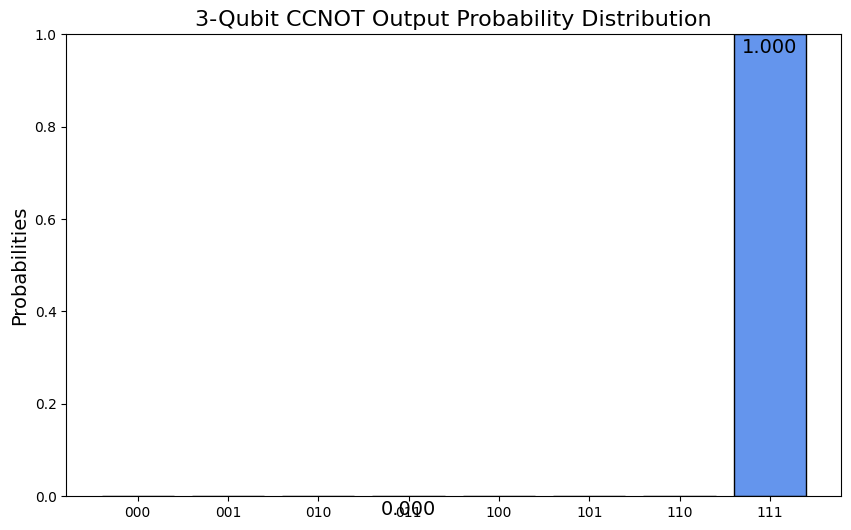

In [ ]:
from math import pi

theta = pi/2

def ccnot(qc):
    # First half rotation
    qc.cry(theta, 1, 2)

    # Correction block
    qc.cx(0, 1)
    qc.cry(-theta, 1, 2)
    qc.cx(0, 1)

    # Second half rotation
    qc.cry(theta, 0, 2)

    return qc


# Build the main circuit
qc = QuantumCircuit(3)

# Set control qubits to |1>
qc.x(0)
qc.x(1)

# Apply custom CCNOT
qc = ccnot(qc)

# Save statevector for probability plot
qc.save_statevector()

# Run statevector simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()
statevector = result.data(0)["statevector"]
probs = [abs(ampl)**2 for ampl in statevector]
labels = ["000", "001", "010", "011", "100", "101", "110", "111"]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")

plt.ylabel("Probabilities", fontsize=14)
plt.title("3-Qubit CCNOT Output Probability Distribution", fontsize=16)
plt.ylim(0, 1)

# Add probability values above bars
for bar, prob in zip(bars, probs):
    if prob > 0:
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() - 0.05,
                 f"{prob:.3f}",
                 ha="center",
                 va="bottom",
                 fontsize=14)

plt.show()


/tmp/ipython-input-1602092769.py:36: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(a)**2 for a in statevector]


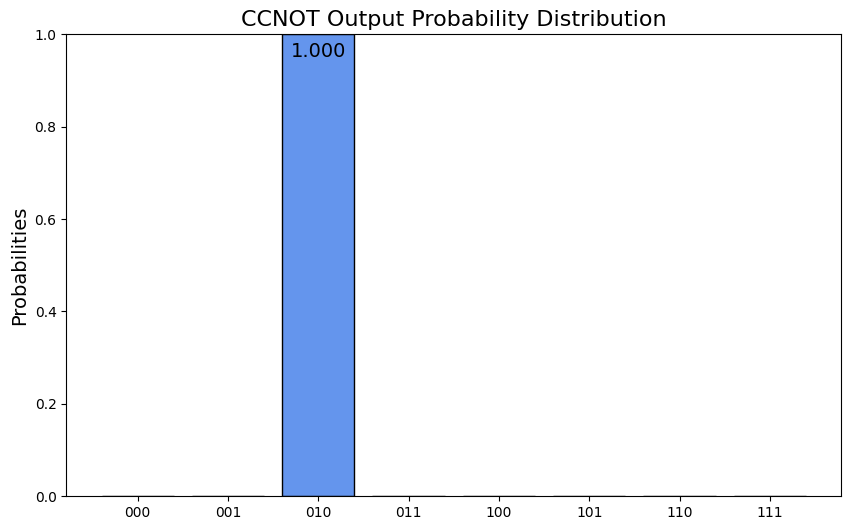

In [ ]:
theta = pi/2

def ccnot(qc):
    # First half rotation
    qc.cry(theta, 1, 2)

    # Correction block
    qc.cx(0, 1)
    qc.cry(-theta, 1, 2)
    qc.cx(0, 1)

    # Second half rotation
    qc.cry(theta, 0, 2)

    return qc

# Build main circuit
qc = QuantumCircuit(3)

# Set only q1 = |1>
qc.x(1)

# Apply CCNOT
qc = ccnot(qc)

# Save the statevector (required in Qiskit 1.x)
qc.save_statevector()

# Run statevector simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()
statevector = result.data(0)["statevector"]


# Compute probabilities
probs = [abs(a)**2 for a in statevector]
labels = ["000","001","010","011","100","101","110","111"]

# --------------------------------------
# Plot probability bar chart
# --------------------------------------
plt.figure(figsize=(10,6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")

plt.ylabel("Probabilities", fontsize=14)
plt.title("CCNOT Output Probability Distribution", fontsize=16)
plt.ylim(0, 1)

# Annotate values
for bar, prob in zip(bars, probs):
    if prob > 0:
        plt.text(
            bar.get_x()+bar.get_width()/2,
            bar.get_height()-0.05,
            f"{prob:.3f}",
            ha="center",
            fontsize=14
        )

plt.show()


/tmp/ipython-input-4181875920.py:21: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(a)**2 for a in statevector]


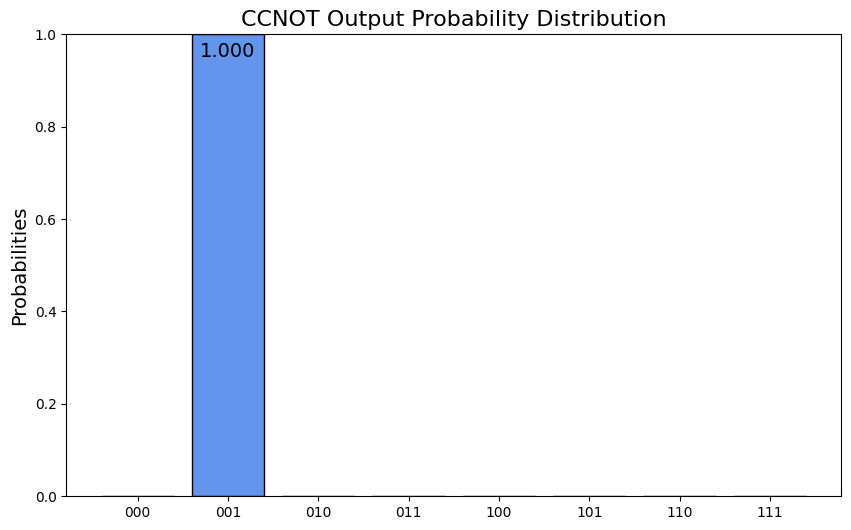

In [ ]:
theta = pi/2

# Build main circuit
qc = QuantumCircuit(3)

# Set only q1 = |1>
qc.x(0)

# Apply CCNOT
qc = ccnot(qc)

# Save the statevector (required in Qiskit 1.x)
qc.save_statevector()

# Run statevector simulator
backend = AerSimulator(method="statevector")
result = backend.run(qc).result()
statevector = result.data(0)["statevector"]

# Compute probabilities
probs = [abs(a)**2 for a in statevector]
labels = ["000","001","010","011","100","101","110","111"]

# Plot probability bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")

plt.ylabel("Probabilities", fontsize=14)
plt.title("CCNOT Output Probability Distribution", fontsize=16)
plt.ylim(0, 1)

# Annotate values
for bar, prob in zip(bars, probs):
    if prob > 0:
        plt.text(
            bar.get_x()+bar.get_width()/2,
            bar.get_height()-0.05,
            f"{prob:.3f}",
            ha="center",
            fontsize=14
        )

plt.show()


In [ ]:
def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2*asin(sqrt(prob))

In [ ]:
# Compute Required Probabilities
max_child_age = 8

# P(child)
population_child = train[train.Age.le(max_child_age)]
p_child = len(population_child) / len(train)

# P(female)
population_female = train[train.Sex.eq("female")]
p_female = len(population_female) / len(train)

# Conditional survival probabilities
population_f_c = population_female[population_female.Age.le(max_child_age)]
p_surv_f_c = len(population_f_c[population_f_c.Survived.eq(1)]) / len(population_f_c)

population_f_a = population_female[population_female.Age.gt(max_child_age)]
p_surv_f_a = len(population_f_a[population_f_a.Survived.eq(1)]) / len(population_f_a)

population_male = train[train.Sex.eq("male")]
population_m_c = population_male[population_male.Age.le(max_child_age)]
p_surv_m_c = len(population_m_c[population_m_c.Survived.eq(1)]) / len(population_m_c)

population_m_a = population_male[population_male.Age.gt(max_child_age)]
p_surv_m_a = len(population_m_a[population_m_a.Survived.eq(1)]) / len(population_m_a)



In [ ]:
def ccry(qc, theta, control1, control2, target):
    qc.cry(theta/2, control2, target)
    qc.cx(control1, control2)
    qc.cry(-theta/2, control2, target)
    qc.cx(control1, control2)
    qc.cry(theta/2, control1, target)
    return qc


In [ ]:
# Build Full Quantum Circuit
qc = QuantumCircuit(3)

# Encode P(child)
qc.ry(prob_to_angle(p_child), 0)

# Encode P(female)
qc.ry(prob_to_angle(p_female), 1)

# --- Male Adults (|00>)
qc.x(0); qc.x(1)
ccry(qc, prob_to_angle(p_surv_m_a), 0, 1, 2)
qc.x(0); qc.x(1)

# --- Male Children (|01>)
qc.x(0)
ccry(qc, prob_to_angle(p_surv_m_c), 0, 1, 2)
qc.x(0)

# --- Female Adults (|10>)
qc.x(1)
ccry(qc, prob_to_angle(p_surv_f_a), 0, 1, 2)
qc.x(1)

# --- Female Children (|11>)
ccry(qc, prob_to_angle(p_surv_f_c), 0, 1, 2)



/tmp/ipython-input-3927451026.py:9: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  probs = [abs(a)**2 for a in statevector]


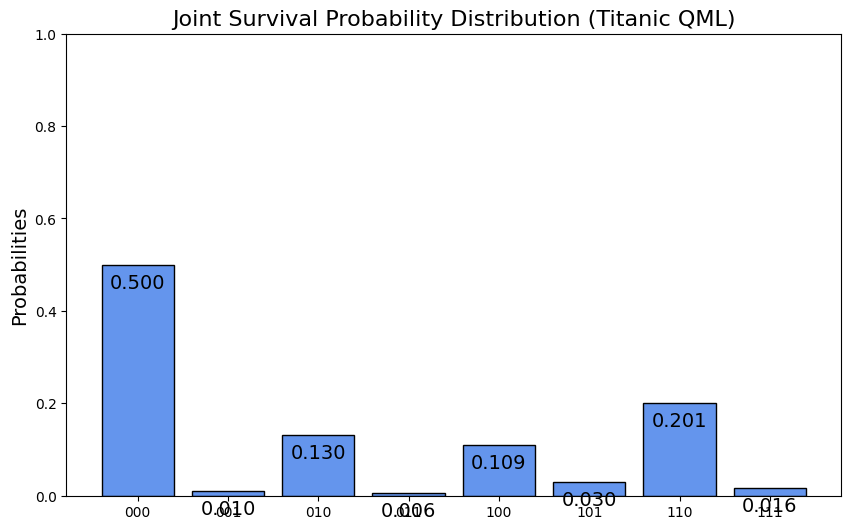

In [ ]:
# Extract statevector for probability bar plot
qc.save_statevector()

backend = AerSimulator(method="statevector")
result = backend.run(qc).result()
statevector = result.data(0)["statevector"]

# Compute joint probabilities
probs = [abs(a)**2 for a in statevector]
labels = ["000","001","010","011","100","101","110","111"]

# Plot Probability Bar Graph
plt.figure(figsize=(10,6))
bars = plt.bar(labels, probs, color="cornflowerblue", edgecolor="black")

plt.ylabel("Probabilities", fontsize=14)
plt.title("Joint Survival Probability Distribution (Titanic QML)", fontsize=16)
plt.ylim(0, 1)

# Add probability labels
for bar, prob in zip(bars, probs):
    if prob > 0:
        plt.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() - 0.05,
                 f"{prob:.3f}",
                 ha="center",
                 fontsize=14)

plt.show()
